In [1]:
import sys
!{sys.executable} -m pip install --upgrade --user pip
!{sys.executable} -m pip install --user root_numpy
!{sys.executable} -m pip install --user matplotlib

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
Requirement already up-to-date: pip in /home/student/.local/lib/python2.7/site-packages (19.0.3)
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [2]:
from root_numpy import root2array

Welcome to ROOTaaS 6.06/08


In [3]:
filename_tt = 'mc15_13TeV.410000.PwPyEG_P2012_ttbar_hdamp172p5_nonallhad.1fatjet1lep_raw.root'
filename_Z = 'mc15_13TeV.364113.Sh_221_NNPDF30NNLO_Zmumu_MAXHTPTV1000_E_CMS.1fatjet1lep_raw.root'

In [4]:
# Convert a TTree in a ROOT file into a NumPy structured array
arr_tt = root2array(filename_tt, branches=['fatjet_n','fatjet_pt','fatjet_eta','fatjet_E','fatjet_m','fatjet_D2','fatjet_tau32'])
arr_Z = root2array(filename_Z, branches=['fatjet_n','fatjet_pt','fatjet_eta','fatjet_E','fatjet_m','fatjet_D2','fatjet_tau32'])

TClass::Init:0: RuntimeWarning: no dictionary for class ROOT::TIOFeatures is available


In [5]:
# Rename the fields
arr_tt.dtype.names = ('fatjet_n','fatjet_pt','fatjet_eta','fatjet_E','fatjet_m','fatjet_D2','fatjet_tau32')
arr_Z.dtype.names = ('fatjet_n','fatjet_pt','fatjet_eta','fatjet_E','fatjet_m','fatjet_D2','fatjet_tau32')

In [6]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(arr_tt['fatjet_n'], color='g', histtype='step', label='tt')
plt.hist(arr_Z['fatjet_n'], color='b', histtype='step', label='Z')
plt.suptitle('Number of fatjets in different processes')
plt.xlabel('Number of fatjets')
plt.ylabel('Events')
plt.legend()
plt.show()

In [ ]:
import numpy as np
ROC = np.zeros((5,2))
for jThreshold in range(0,5):
    threshold = jThreshold
    tt_Pos = np.array(np.where(arr_tt['fatjet_n']>threshold)).size*100/arr_tt.size
    Z_Pos = np.array(np.where(arr_Z['fatjet_n']>threshold)).size*100/arr_Z.size
    ROC[jThreshold,:] = np.array((tt_Pos, Z_Pos))
plt.plot(ROC[:,0], ROC[:,1])
plt.suptitle('Receiver Operating Characteristic Curve')
plt.xlabel('tt Positive (%)')
plt.ylabel('Z Positive (%)')
for jThreshold in range(0,5):
    plt.annotate(str(jThreshold)+" fatjet", (ROC[jThreshold,0], ROC[jThreshold,1]))
plt.show()

In [ ]:
Area_under_curve = np.trapz(ROC[:,1][::-1], ROC[:,0][::-1])/10000
# [::-1] flips np.ndarray
# divide by 10000 to go from %
print(Area_under_curve)

In [ ]:
for jThreshold in range(0,5):
    print(str(jThreshold)+" fatjet event is "+str(ROC[jThreshold,0])+"% positive for tt, "+str(ROC[jThreshold,1])+"% positive for Z")

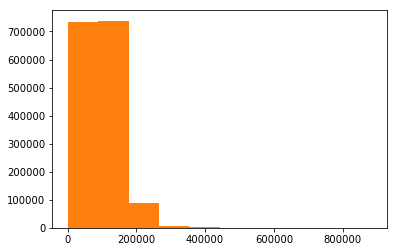

In [11]:
import numpy as np
plt.hist(np.concatenate(arr_tt['fatjet_m']))
plt.show()